In [4]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from IPython.display import Image
import imutils

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import keras
import tensorflow.keras as K

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import imutils




In [5]:
os.mkdir('/content/Test-Data')
os.mkdir('/content/Test-Data/glioma_tumor')
os.mkdir('/content/Test-Data/meningioma_tumor')
os.mkdir('/content/Test-Data/pituitary_tumor')
os.mkdir('/content/Test-Data/no_tumor')

In [6]:
test_dir = '/content/drive/MyDrive/majorProject/Dataset_Old/Testing/'

In [7]:
classes = os.listdir('/content/drive/MyDrive/majorProject/Dataset_Old/Testing')
classes

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']

In [8]:
def crop_image(image, plot=False):

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)
    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    if plot:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
test_glioma = test_dir + 'glioma_tumor'
test_meningioma = test_dir + 'meningioma_tumor'
test_pituitary = test_dir + 'pituitary_tumor'
test_no_tumor = test_dir + 'no_tumor'

j = 0
for i in tqdm(os.listdir(test_glioma)):
  path = os.path.join(test_glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/glioma_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_meningioma)):
  path = os.path.join(test_meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/meningioma_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_pituitary)):
  path = os.path.join(test_pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/pituitary_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_no_tumor)):
  path = os.path.join(test_no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/no_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

100%|██████████| 105/105 [00:02<00:00, 45.52it/s]


In [10]:
datagen = ImageDataGenerator(rotation_range=10,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

test_data = datagen.flow_from_directory('/content/Test-Data/',
                                         target_size=(240, 240),
                                        class_mode='categorical',
                                        shuffle=False)


Found 394 images belonging to 4 classes.


In [11]:
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [14]:
import tensorflow as tf

VGG16 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/vgg16_model.keras')


In [15]:
import tensorflow as tf

EfficientNetB1 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/EfficientnetB1.keras')


In [16]:
Vgg16Prob = VGG16.predict(test_data, verbose=1)
Vgg16_test_pred = tf.argmax(Vgg16Prob, axis=1)

13/13 [==============================] - 247s 19s/step


In [17]:
efficientnetB1Prob = EfficientNetB1.predict(test_data, verbose=1)
efficientnetB1_test_pred = tf.argmax(efficientnetB1Prob, axis=1)

13/13 [==============================] - 51s 4s/step


In [18]:
avg_probabilities = np.mean([
    efficientnetB1Prob,
    Vgg16Prob], axis=0)

# Compute average ensemble predictions
avg_predictions = tf.argmax(avg_probabilities, axis=1)

In [19]:
weights = [0.6, 0.4]
model_probabilities = [efficientnetB1Prob, Vgg16Prob]

# Compute weighted average probabilities
weighted_avg_probabilities = sum([w * p for w, p in zip(weights, model_probabilities)])

# Compute weighted average ensemble predictions
weighted_avg_predictions = tf.argmax(weighted_avg_probabilities, axis=1)

In [20]:
predictions = ensemble_model.predict(np.expand_dims(processed_image, axis=0))

NameError: name 'ensemble_model' is not defined

In [21]:
model_probabilities = [efficientnetB1Prob, Vgg16Prob]

geometric_mean_probabilities = np.power(np.multiply(model_probabilities[0],
                                                    model_probabilities[1]),
                                        1/len(model_probabilities))


geometric_mean_predictions = tf.argmax(geometric_mean_probabilities, axis=1)

In [22]:
y_test = test_data.classes

In [23]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=12):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    disp = sns.heatmap(
        cm, annot=True, cmap='Blues',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=0.5, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)


    disp.set_title('Confusion Matrix', fontsize=24)
    disp.set_xlabel('Predicted Label', fontsize=20)
    disp.set_ylabel('True Label', fontsize=20)
    plt.yticks(rotation=0)

    plt.show()

    return

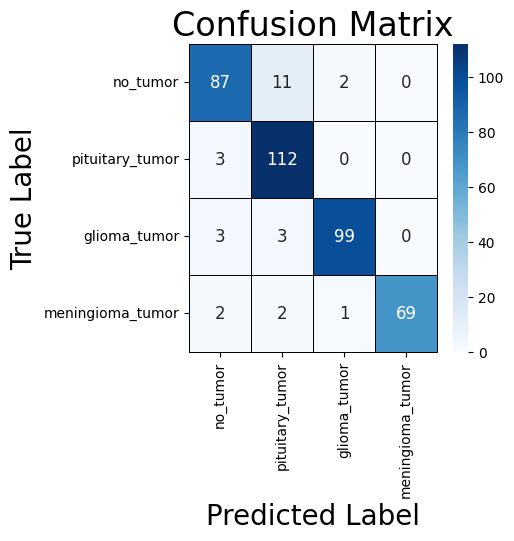

In [24]:
#VGG16 confusion Matrix

plot_confusion_matrix(
    y_test,
    Vgg16_test_pred,
    figsize=(4, 4),
    classes=classes)

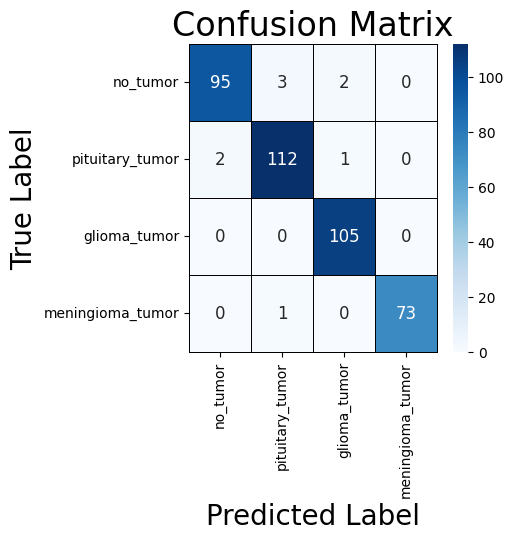

In [25]:
#Confusion Matrix for EfficientNetB1
plot_confusion_matrix(
    y_test,
    efficientnetB1_test_pred,
    figsize=(4, 4),
    classes=classes)

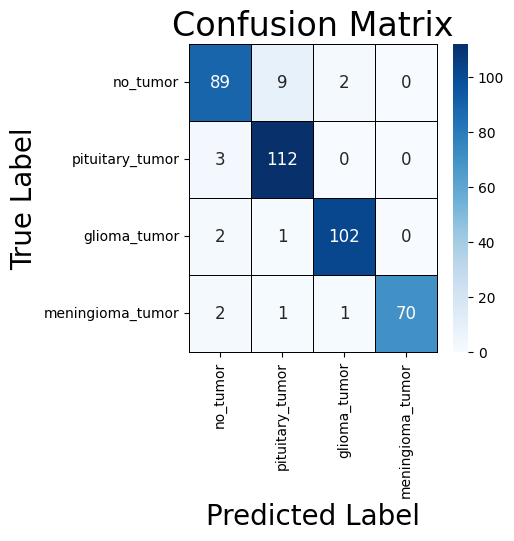

In [26]:
#Average Confusion Matrix
plot_confusion_matrix(
    y_test,
    avg_predictions,
    figsize=(4, 4),
    classes=classes)

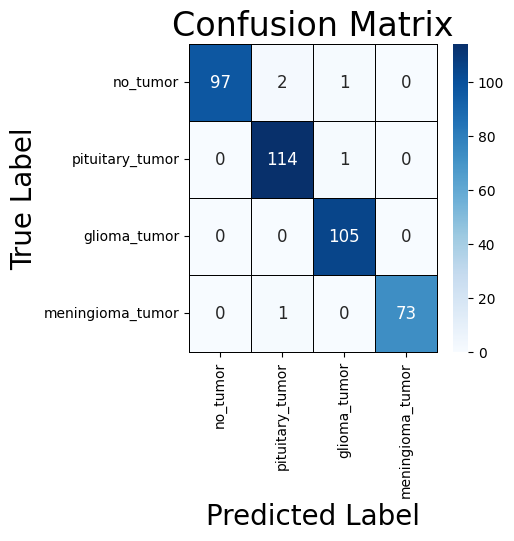

In [27]:
#Weighted Average Confusion Matrix
plot_confusion_matrix(
    y_test,
    weighted_avg_predictions,
    figsize=(4, 4),
    classes=classes)

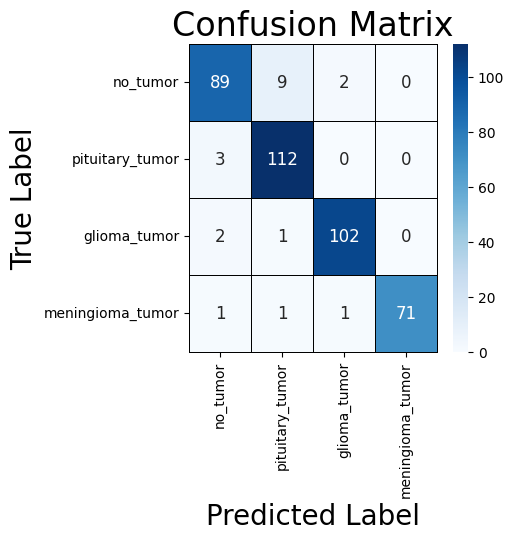

In [28]:
#Geometric mean Confusion Matrix
plot_confusion_matrix(
    y_test,
    geometric_mean_predictions,
    figsize=(4, 4),
    classes=classes)

In [29]:
#EfficientNetB1 Report
print(classification_report(y_test,
                            efficientnetB1_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.98      0.95      0.96       100
 pituitary_tumor       0.97      0.97      0.97       115
    glioma_tumor       0.97      1.00      0.99       105
meningioma_tumor       1.00      0.99      0.99        74

        accuracy                           0.98       394
       macro avg       0.98      0.98      0.98       394
    weighted avg       0.98      0.98      0.98       394



In [30]:
#VGG16 Report
print(classification_report(y_test,
                            Vgg16_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.92      0.87      0.89       100
 pituitary_tumor       0.88      0.97      0.92       115
    glioma_tumor       0.97      0.94      0.96       105
meningioma_tumor       1.00      0.93      0.97        74

        accuracy                           0.93       394
       macro avg       0.94      0.93      0.93       394
    weighted avg       0.93      0.93      0.93       394



In [31]:
# Average Ensemble Report
print(classification_report(y_test,
                            avg_predictions,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.93      0.89      0.91       100
 pituitary_tumor       0.91      0.97      0.94       115
    glioma_tumor       0.97      0.97      0.97       105
meningioma_tumor       1.00      0.95      0.97        74

        accuracy                           0.95       394
       macro avg       0.95      0.95      0.95       394
    weighted avg       0.95      0.95      0.95       394



In [32]:
# Weighted Average Ensemble Report
print(classification_report(y_test,
                            weighted_avg_predictions,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       1.00      0.97      0.98       100
 pituitary_tumor       0.97      0.99      0.98       115
    glioma_tumor       0.98      1.00      0.99       105
meningioma_tumor       1.00      0.99      0.99        74

        accuracy                           0.99       394
       macro avg       0.99      0.99      0.99       394
    weighted avg       0.99      0.99      0.99       394



In [33]:
# Geometric Mean Ensemble Report
print(classification_report(y_test,
                            geometric_mean_predictions,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.94      0.89      0.91       100
 pituitary_tumor       0.91      0.97      0.94       115
    glioma_tumor       0.97      0.97      0.97       105
meningioma_tumor       1.00      0.96      0.98        74

        accuracy                           0.95       394
       macro avg       0.95      0.95      0.95       394
    weighted avg       0.95      0.95      0.95       394

